In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
'''
folder_names: list of str. 所有文件名称（['Tail_652_1', 'Tail_652_2', ...]）
mat_paths: list of str. 所有mat路径（['D:\\_SRT\\Dataset\\Data_Download\\Tail_652_1\\652200101100441.mat', ...]）
var_names: list of str. 要处理的变量. 实际用到的变量.
'''

'''
可能用到的变量：
WS: WIND SPEED
TAS: TRUE AIRSPEED LSP
GS: GROUND SPEED LSP

WD: WIND DIRECTION TRUE
PTCH: PITCH ANGLE LSP
AOA1: ANGLE OF ATTACK 1
AOA2: ANGLE OF ATTACK 2

FPAC: FLIGHT PATH ACCELERATION
LATG: LATERAL ACCELERATION
LONG: LONGITUDINAL ACCELERATION
VRTG: VERTICAL ACCELERATION
CTAC: CROSS TRACK ACCELERATION

ALT: PRESSURE ALTITUDE LSP
ALTR: ALTITUDE RATE
'''


# 指定文件夹路径
download_path = 'D:\_SRT\Dataset\Data_Download'

# 获取文件夹下的所有文件名称
folder_names = os.listdir(download_path) # Tail_652_1,Tail_652_2,...

# 获取所有mat路径
mat_paths=[]
for folder_name in folder_names:
     folder_path=os.path.join(download_path,folder_name) # mat所在文件夹的存储路径
     mat_names=os.listdir(folder_path)
     for index, mat_name in enumerate(mat_names):
         mat_id=index # 该mat文件的序号，从0开始
         mat_paths.append(os.path.join(folder_path,mat_name))

print(len(mat_paths))


4430


In [2]:
'''
读取mat文件,进行初始采样.
'''
import scipy.io as scio
from sklearn.preprocessing import StandardScaler

var_names=[
        'WS', # WIND SPEED （KNOTS）
        'TAS', # TRUE AIRSPEED LSP（KNOTS）
        'GS', # GROUND SPEED LSP（KNOTS）

        'ALT', # PRESSURE ALTITUDE LSP (FEET)
        'ALTR', # ALTITUDE RATE (FT/MIN)
    
        'WD', # WIND DIRECTION TRUE （DEG）
        'TH', #	TRUE HEADING LSP (DEG)
        'MH', #	MAGNETIC HEADING LSP (DEG)
        'PTCH', # PITCH ANGLE LSP (DEG)
        'AOA1', # ANGLE OF ATTACK 1 (DEG)
        'AOA2', # ANGLE OF ATTACK 2 (DEG)

        'FPAC', # FLIGHT PATH ACCELERATION (G)
        'LATG', # LATERAL ACCELERATION (G)
        'LONG', # LONGITUDINAL ACCELERATION (G)
        'VRTG', # VERTICAL ACCELERATION (G)
        'CTAC', # CROSS TRACK ACCELERATION (G)

        'FLAP', # T.E. FLAP POSITION (COUNTS)
        'IVV', # INERTIAL VERTICAL SPEED LSP (FT/MIN)
        'MACH', # MACH LSP (MACH)
        'WOW' # WEIGHT ON WHEELS (0)
        ]

mat_index=9
X_this_mat=[]# 待采样的本mat中的数据
mat_data=scio.loadmat(mat_paths[mat_index]) # 读取到的mat数据. mat_data: dict.
mat_data_len=mat_data['WSHR'][0][0][0].shape[0] # 本mat文件的时间步长度
for var_name in var_names: # 遍历各变量, 每次处理本mat文件中一个变量的数据
    var_data=mat_data[var_name][0][0][0]# 读取到的本mat中某变量的数据. numpy array. Shape: (var_len, 1)
    var_rate=mat_data[var_name][0][0][1][0][0] # 该变量采样率
    var_this_mat=[] # 待采样的当前mat文件中某一变量的时间序列数据
    for j in range(0,mat_data_len): # 遍历时间步
        var_this_mat.append(var_data[j*var_rate][0]) # 依次将每个时间点的数据添加至var_this_mat
    X_this_mat.append(var_this_mat) # 把该变量的时间序列数据添加至X_this_mat(本mat的数据)中

#mat_data: shape: (len(var_names), mat_data_len)
mat_data=np.array(X_this_mat).T # 将数据转换为numpy数组 (此处mat_data名称被复用)

In [3]:
pd.DataFrame(mat_data, columns=var_names).describe()

,WS,TAS,GS,ALT,ALTR,WD,TH,MH,PTCH,AOA1,AOA2,FPAC,LATG,LONG,VRTG,CTAC,FLAP,IVV,MACH,WOW
count,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000,5340.000000
mean,18.002627,261.546735,260.511540,13890.773408,-15.601498,-24.882465,-91.701814,-92.540743,2.099573,-4.140153,-4.108626,-0.000324,-0.014687,0.011676,0.897515,0.003373,510.856180,-6.844944,0.423075,0.740637
std,25.173132,165.497387,163.094735,11098.422709,1123.052073,59.614802,88.345905,86.150186,2.734747,2.767275,1.691247,0.028397,0.104403,0.114543,0.686444,0.092830,942.041928,1126.390571,0.271385,0.438326
min,0.000000,0.000000,0.000000,190.000000,-4368.000000,-180.000005,-179.989136,-179.912232,-7.118930,-12.524322,-13.579002,-0.146550,-1.083300,-1.083300,-3.375000,-0.536373,115.000000,-4452.000000,0.000000,0.000000
25%,4.980470,0.000000,0.000000,804.000000,-128.000000,-63.281255,-142.208283,-139.393112,0.241692,-4.218719,-4.746062,-0.004885,-0.008880,-0.017008,0.996990,-0.005862,115.000000,-78.000000,0.000000,0.000000
50%,11.953128,335.031250,334.187500,13445.500000,-16.000000,-33.046880,-121.837494,-122.485657,2.274102,-3.779265,-4.350555,0.000000,-0.004816,0.020076,1.006146,0.000000,116.000000,0.000000,0.528286,1.000000
75%,15.937504,404.953125,393.375000,24012.000000,64.000000,0.000000,-80.302170,-79.938256,2.658612,-2.329085,-2.812476,0.002931,-0.000244,0.035316,1.010724,0.004885,116.000000,41.000000,0.662823,1.000000
max,98.613304,429.187500,424.625000,28302.000000,4000.000000,179.296875,179.989136,179.522232,15.929701,5.888630,5.097620,0.310686,0.087640,0.300492,1.349496,0.563729,3701.000000,4122.000000,0.714861,1.000000


In [4]:
def get_coefficients(case=0):
    if case==0:
        CF0, CF1, CF2, CF3, CF4, CF5=0.0156, 0.091, 0.0, 0.0, 0.0, 0.0
        D0, D1, D2, D3=0.013285, 0.052868, -0.07182, 0.071561
    if case==1:
        CF0, CF1, CF2, CF3, CF4, CF5=0.062114, 0.0905781, 2.48561e-03, -1.164058e-04, 0.0, 0.0
        D0, D1, D2, D3=0.026143, 0.022358, -0.00083, 0.16338
    if case==5:
        CF0, CF1, CF2, CF3, CF4, CF5=0.192638, 0.123509, -0.0051477, 6.4968e-04, -3.0891e-05, 4.1291e-07
        D0, D1, D2, D3=0.045214, -0.0178, 0.04373, 0.002101
    return (CF0, CF1, CF2, CF3, CF4, CF5), (D0, D1, D2, D3)

In [5]:
from math import sin, cos

# 常数
g=19.07583 # (KNOTS/S)
WG=110000 # 机身总重（POUND）
AO=661.478599 # 海平面声速（KNOTS）
(CF0, CF1, CF2, CF3, CF4, CF5), (D0, D1, D2, D3)=get_coefficients(case=0)


_partialV_partialT_list=[]
_partialG_partialT_list=[]
_partialH_partialT_list=[]
_partialX_partialT_list=[]
partialV_partialT_list=[]
partialG_partialT_list=[]
partialH_partialT_list=[]
partialX_partialT_list=[]


for i in range(1, mat_data.shape[0]-1 ): # 遍历时间点
    # 原始数据
    AOA=(mat_data[i][var_names.index('AOA1')]+mat_data[i][var_names.index('AOA2')])/2 # 攻角（DEG）
    MACH=mat_data[i][var_names.index('MACH')] # 马赫数（MACH）
    ALTR=mat_data[i][var_names.index('ALTR')] # 海拔变化率（FT/MIN）
    ALT=mat_data[i][var_names.index('ALT')] # 海拔（FEET）
    TAS=mat_data[i][var_names.index('TAS')]+0.1 # 空速（KNOTS）# +0.1是为了防止除数为0，下同
    PTCH=mat_data[i][var_names.index('PTCH')] # 俯仰角（DEG）
    GS=mat_data[i][var_names.index('GS')] # 地速（KNOTS）
    WS=mat_data[i][var_names.index('WS')] # 风速（KNOTS）
    IVV=mat_data[i][var_names.index('IVV')] # 垂直速度（KNOTS）
    TH=AOA-PTCH # 轨迹角（DEG）
    
    #中间变量（用于计算升力LIFT和阻力DRAG）
    X=AOA+1
    CL=((((CF5*X+CF4)*X+CF3)*X+CF2)*X+CF1)*X+CF0
    CD=((D3*CL+D2)*CL+D1)*CL+D0
    TO=518.67 # MSL处的标准温度（华氏度）(预设常量参数)
    TMP=TO-0.0035662*ALT
    DELTA=(TMP/TO)**5.256
    Q=1451770*MACH*MACH*DELTA

    #中间变量（用于计算推力THRST）
    (R00, R01, R02)=(14688.74, -0.65187546, 6.7371e-05)
    (R10, R11, R12)=(-13.9295, 0.000751143, -1.5405e-07)
    (R20, R21, R22)=(0.014643, 5.3444e-07, -4.8907e-10)
    AA0=(R02*ALT+R01)*ALT+R00
    AA1=(R12*ALT+R11)*ALT+R10
    AA2=(R22*ALT+R21)*ALT+R20

    #结果
    LIFT=Q*CL # 升力
    DRAG=Q*CD # 阻力
    THRST=2*((AA2*TAS+AA1)*TAS+AA0) # 推力
    W_z=0 # 惯性风z分量暂时置为0
    W_x=WS # 惯性风x分量用WS表示
    partialWx_partialT=(mat_data[i+1][var_names.index('WS')]-mat_data[i-1][var_names.index('WS')])/2 # 用前1秒和后一秒的数据差分求偏导，下同
    
    #四个偏导（真实值）
    partialV_partialT=(mat_data[i+1][var_names.index('TAS')]-mat_data[i-1][var_names.index('TAS')])/2
    partialG_partialT=(mat_data[i+1][var_names.index('IVV')]/(mat_data[i+1][var_names.index('TAS')]+0.1)-
                       mat_data[i-1][var_names.index('IVV')]/(mat_data[i-1][var_names.index('TAS')]+0.1))/2
    partialH_partialT=IVV # 垂直升降率(FT/S)
    partialX_partialT=GS # 地速(KNOTS)
    
    #四个偏导（机理公式计算结果）
    _partialV_partialT=g*((THRST*cos(AOA)-DRAG)/WG-sin(TH))-partialWx_partialT*cos(TH)-0*sin(TH)
    _partialG_partialT=((g*(THRST*sin(AOA)+LIFT)/WG-cos(TH))+partialWx_partialT*sin(TH)-0*cos(TH))/TAS
    _partialH_partialT=TAS*sin(TH)+W_z
    _partialX_partialT=TAS*cos(TH)+W_x

    #将真值与预测值记录到列表中
    _partialV_partialT_list.append(_partialV_partialT)
    _partialG_partialT_list.append(_partialG_partialT)
    _partialH_partialT_list.append(_partialH_partialT)
    _partialX_partialT_list.append(_partialX_partialT)
    partialV_partialT_list.append(partialV_partialT)
    partialG_partialT_list.append(partialG_partialT)
    partialH_partialT_list.append(partialH_partialT)
    partialX_partialT_list.append(partialX_partialT)

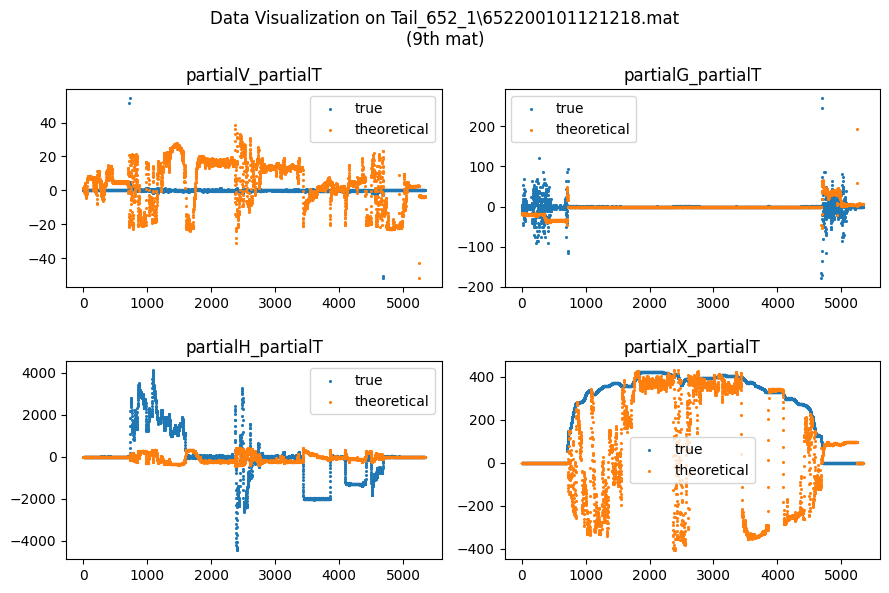

In [9]:

enum=[partialV_partialT_list, partialG_partialT_list, partialH_partialT_list, partialX_partialT_list]
_enum=[_partialV_partialT_list, _partialG_partialT_list, _partialH_partialT_list, _partialX_partialT_list]
names=['partialV_partialT', 'partialG_partialT', 'partialH_partialT', 'partialX_partialT']


'''
将由机理公式算出的4个偏导值和根据实际数据测得的4个偏导值分别放到一个图中观察变化趋势。
理论值是在每一个时间点应用机理公式算出的瞬时值。
'''


plt.figure(figsize=(9,6))
plt.suptitle('Data Visualization on {}\n({}th mat)'.format(mat_paths[mat_index][-30:], mat_index))
for i in range(4):
    plt.subplot(2,2,i+1)
    '''
    plt.plot(enum[i])
    plt.plot(_enum[i])
    '''
    plt.scatter(range(len(enum[i])), enum[i], s=1.5)
    plt.scatter(range(len(_enum[i])), _enum[i], s=1.5)
    
    plt.title(names[i])
    plt.legend(['true', 'theoretical'])
plt.tight_layout(h_pad=2)
plt.show()

In [7]:

        '''
        a_wx=g*(cos(TH)*FPAC-sin(AOA)*LRTG)
        a_wz=g*(-sin(TH)*FPAC+cos(AOA)*LRTG)
        
        _a_wx=g*((T*cos(AOA)-DRAG)/W-sin(TH))
        _a_wz=g*(T*sin(AOA)+LIFT)/W-cos(TH))
        '''
        

'\na_wx=g*(cos(TH)*FPAC-sin(AOA)*LRTG)\na_wz=g*(-sin(TH)*FPAC+cos(AOA)*LRTG)\n\n_a_wx=g*((T*cos(AOA)-DRAG)/W-sin(TH))\n_a_wz=g*(T*sin(AOA)+LIFT)/W-cos(TH))\n'